In [2]:
import pandas as pd
import numpy as np

import statsmodels
import matplotlib.pyplot as plt



In [3]:
#Checking the versions

print(statsmodels.__version__)
print(np.__version__)
print(pd.__version__)

0.14.0
1.23.5
2.0.2


In [5]:
#THE DATASET THAT I WOULD BE EXPLORING IS

df=pd.read_csv('AirPassengers.csv', header=0, parse_dates=[0], names=['Month', 'Passengers'], index_col = 0)

In [6]:
#Looking at the top features

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
#I need passengers from (start-end)

df2=df['1950-02-01' : '1980-03-05']


<AxesSubplot: xlabel='Month'>

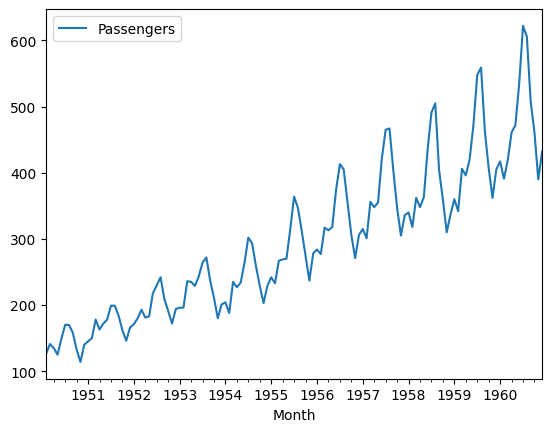

In [9]:
#Plot
df2.plot()

In [ ]:
#Observations from the
#The number of passengers keep inverse with time(in years)


<AxesSubplot: xlabel='Month'>

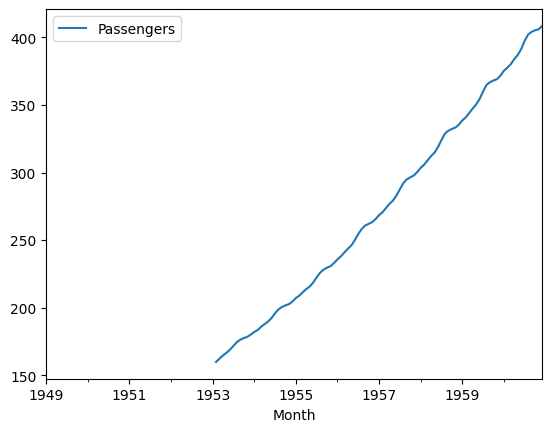

In [16]:
#Mean Variance, autocovariance

df.rolling(window=50).mean().plot()


In [17]:
#How does variance changes with time

from statsmodels.tsa.stattools import acf


<AxesSubplot: xlabel='Month'>

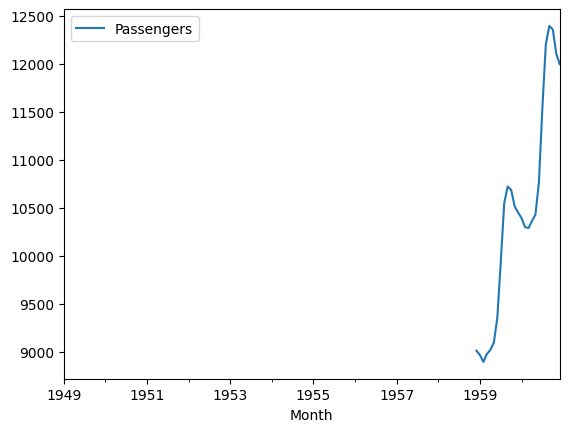

In [18]:
df.rolling(window=120).var().plot()

In [19]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.Passengers, autolag = 'AIC', regression = 'ct')


(-2.1007818138446686,
 0.5456589343124556,
 13,
 130,
 {'1%': -4.030152423759672,
  '5%': -3.444817634956759,
  '10%': -3.1471816659080565},
 993.2814778200581)

In [20]:
log_pass=df.Passengers.apply(lambda x: np.log(x))
log_pass



Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Passengers, Length: 144, dtype: float64

<AxesSubplot: xlabel='Month'>

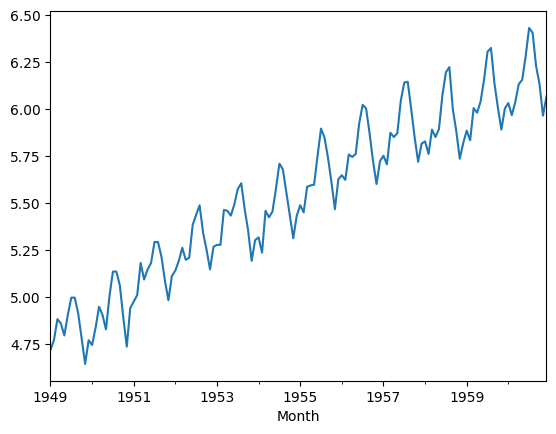

In [22]:
log_pass.plot()

<AxesSubplot: xlabel='Month'>

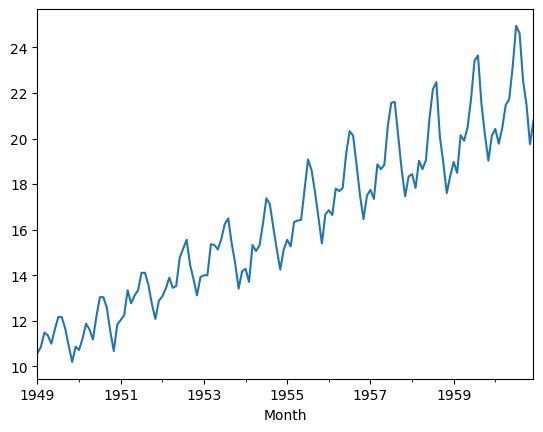

In [21]:
df_pass=df.Passengers.apply(lambda x: x** .5)
df_pass.plot()

<AxesSubplot: xlabel='Month'>

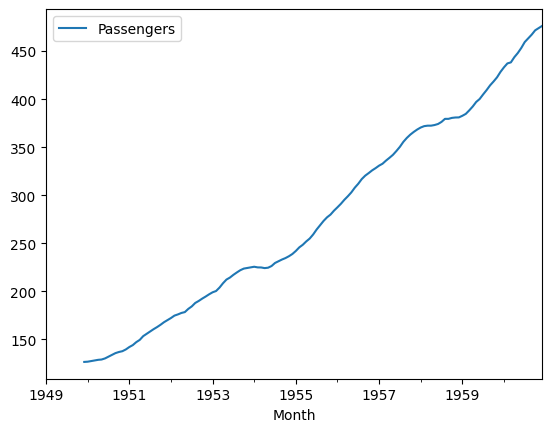

In [23]:
df.rolling(window =12).mean().plot()

<AxesSubplot: xlabel='Month'>

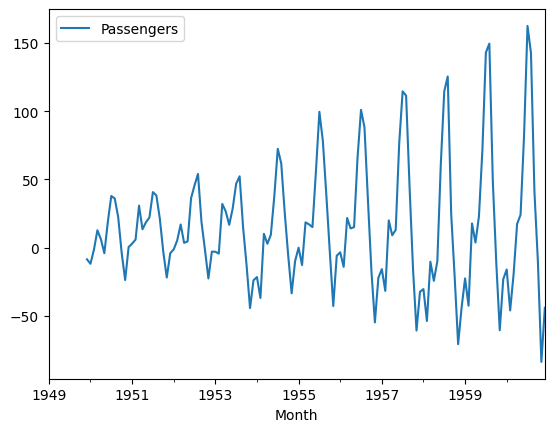

In [26]:
my_rolling_mean=df.rolling(window =12).mean()
passe_detre=df - my_rolling_mean

passe_detre.plot()

In [ ]:
log_rolling_mean=

<AxesSubplot: xlabel='Month'>

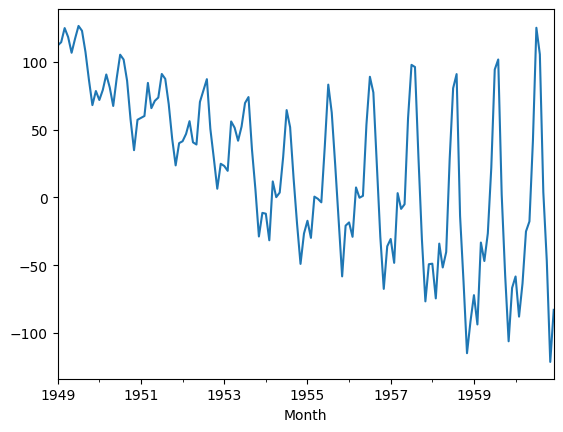

In [28]:
from statsmodels.regression.linear_model import OLS
model = OLS(df.Passengers.values, list(range(len(df.values))))
result = model.fit()
result.params
fit = pd.Series(result.predict(list(range(len(df.values)))), index = df.index)

passengers_detrended = df.Passengers - fit
passengers_detrended.plot()

<AxesSubplot: xlabel='Month'>

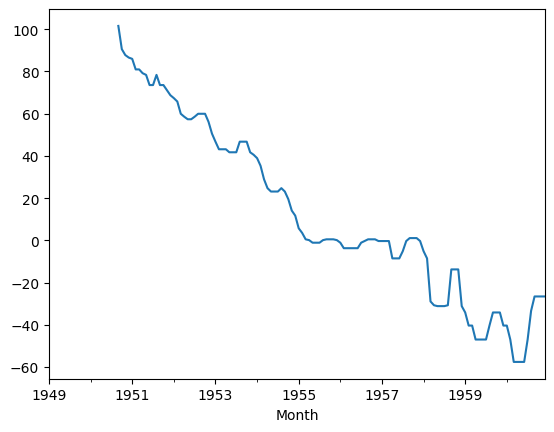

In [29]:
passengers_detrended.rolling(21).median().plot()

<AxesSubplot: xlabel='Month'>

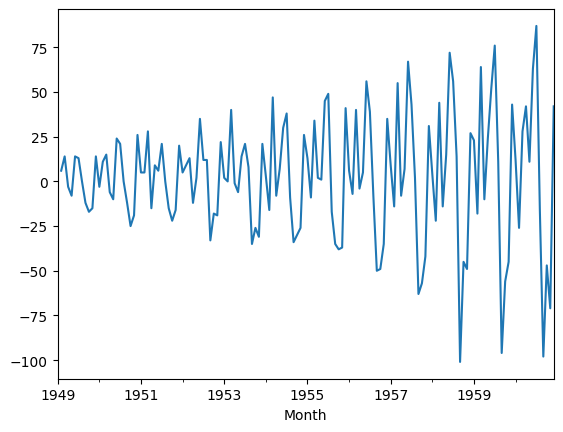

In [30]:
(df.Passengers - df.Passengers.shift()).plot()

<AxesSubplot: xlabel='Month'>

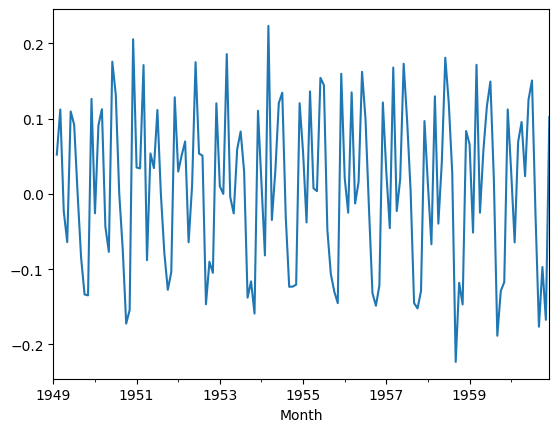

In [32]:
log_pass_diff=log_pass - log_pass.shift()
log_pass_diff.plot()